In [1]:
import pandas as pd
%matplotlib inline

In [2]:
# importando apenas colunas especificas:
# nuemração corresponde ao numero da coluna, contando de 0
# 3 - hospital
# 6 - municipio
# 7 - complexidade
# 8 - carater_atendimento
# 12 - sub grupo
# 14 - procedimento

cirurgia = 'sih-janeiro-2017-cirurgias-eletiva-e-emergencia.csv'
df = pd.read_csv(cirurgia, sep=';', encoding='cp1252', usecols=[3,6,7,8,12,14])
df.head()

,Estabelecimento cnes,Municipio do estabelecimento,Complexidade do Procedimento,Carater da internaca/ATENDIMENTO,Sub grupo procedimento realizado,Procedimento realizado
0,6876617 HOSPITAL DA CRIANCA DE BRASILIA JOSE A...,"BRASILIA, DF, BR",Média complexidade,Eletivo,Sub Grupo: 15 - Outras cirurgias,TRATAMENTO C/ CIRURGIAS MULTIPLAS
1,0010456 HBDF HOSPITAL DE BASE DO DISTRITO FEDERAL,"BRASILIA, DF, BR",Média complexidade,Urgência,Sub Grupo: 03 - Cirurgia do sistema nervoso ce...,DERIVACAO VENTRICULAR EXTERNAR-SUBGALEAL EXTERNA
2,0010456 HBDF HOSPITAL DE BASE DO DISTRITO FEDERAL,"BRASILIA, DF, BR",Média complexidade,Urgência,Sub Grupo: 15 - Outras cirurgias,TRATAMENTO C/ CIRURGIAS MULTIPLAS
3,6876617 HOSPITAL DA CRIANCA DE BRASILIA JOSE A...,"BRASILIA, DF, BR",Média complexidade,Eletivo,Sub Grupo: 07 - Cirurgia do aparelho digestivo...,HERNIOPLASTIA UMBILICAL
4,0010456 HBDF HOSPITAL DE BASE DO DISTRITO FEDERAL,"BRASILIA, DF, BR",Alta complexidade,Eletivo,Sub Grupo: 16 - Cirurgia em oncologia,RESSECCAO DE TUMOR DE PARTES MOLES EM ONCOLOGIA


In [3]:
# renomeando as colunas
df.columns=['Hospital', 'Municipio', 'complexidade', 'Carater_atendimento'
            ,'Sub grupo procedimento','Procedimento']
df.head(3)

,Hospital,Municipio,complexidade,Carater_atendimento,Sub grupo procedimento,Procedimento
0,6876617 HOSPITAL DA CRIANCA DE BRASILIA JOSE A...,"BRASILIA, DF, BR",Média complexidade,Eletivo,Sub Grupo: 15 - Outras cirurgias,TRATAMENTO C/ CIRURGIAS MULTIPLAS
1,0010456 HBDF HOSPITAL DE BASE DO DISTRITO FEDERAL,"BRASILIA, DF, BR",Média complexidade,Urgência,Sub Grupo: 03 - Cirurgia do sistema nervoso ce...,DERIVACAO VENTRICULAR EXTERNAR-SUBGALEAL EXTERNA
2,0010456 HBDF HOSPITAL DE BASE DO DISTRITO FEDERAL,"BRASILIA, DF, BR",Média complexidade,Urgência,Sub Grupo: 15 - Outras cirurgias,TRATAMENTO C/ CIRURGIAS MULTIPLAS


In [4]:
# contando o numero de cirurgias
# se cada linha e uma cirurgia, temos 4862 cirurgias ou linhas do dataframe
df.count()

Hospital                  4862
Municipio                 4862
complexidade              4862
Carater_atendimento       4862
Sub grupo procedimento    4862
Procedimento              4862
dtype: int64

In [5]:
df.describe()
# linha describe -> equivale a 16 hospitais, 11 municipios, 
# 2 tipos de complexidade,4 tipos de carater de atendimento...
# linha top -> aquilo que mais aparece: hospital que mais realiza cirurgia e o hospital de base
# a complexidade no geral e media e o carater e de urgencia, a maioria cirurgia obstetrica,
# o procedimento mais realizado e de parto cesariano

,Hospital,Municipio,complexidade,Carater_atendimento,Sub grupo procedimento,Procedimento
count,4862,4862,4862,4862,4862,4862
unique,16,11,2,4,16,495
top,0010456 HBDF HOSPITAL DE BASE DO DISTRITO FEDERAL,"BRASILIA, DF, BR",Média complexidade,Urgência,Sub Grupo: 11 - Cirurgia obstétrica,PARTO CESARIANO
freq,735,1923,4353,3794,1539,1060


In [6]:
df['Sub grupo procedimento'].value_counts()

Sub Grupo: 11 - Cirurgia obstétrica                                                   1539
Sub Grupo: 07 - Cirurgia do aparelho digestivo, orgãos anexos e parede abdominal       893
Sub Grupo: 08 - Cirurgia do sistema osteomuscular                                      651
Sub Grupo: 09 - Cirurgia do aparelho geniturinário                                     474
Sub Grupo: 06 - Cirurgia do aparelho circulatório                                      299
Sub Grupo: 15 - Outras cirurgias                                                       223
Sub Grupo: 04 - Cirurgia das vias aéreas superiores, da cabeça e do pescoço            145
Sub Grupo: 03 - Cirurgia do sistema nervoso central e periférico                       141
Sub Grupo: 16 - Cirurgia em oncologia                                                  110
Sub Grupo: 05 - Cirurgia do aparelho da visão                                           98
Sub Grupo: 12 - Cirurgia torácica                                                       92

In [7]:
# confirmado, foram realizados 1060 partos cesarianos, sendo 166 de alto risco
df['Procedimento'].value_counts()

PARTO CESARIANO                                                                              1060
APENDICECTOMIA                                                                                247
CURETAGEM POS-ABORTAMENTO / PUERPERAL                                                         207
PARTO CESARIANO EM GESTACAO DE ALTO RISCO                                                     166
TRATAMENTO C/ CIRURGIAS MULTIPLAS                                                             135
LAPAROTOMIA EXPLORADORA                                                                       135
ESVAZIAMENTO DE UTERO POS-ABORTO POR ASPIRACAO MANUAL INTRA-UTERINA (AMIU)                    110
COLECISTECTOMIA                                                                               100
COLECISTECTOMIA VIDEOLAPAROSCOPICA                                                             73
TORACOSTOMIA COM DRENAGEM PLEURAL FECHADA                                                      68
ANGIOPLASTIA CORONAR

In [8]:
# numero de cirurgias por cidade
df['Municipio'].value_counts()

BRASILIA, DF, BR        1923
GAMA, DF, BR             555
CEILANDIA, DF, BR        461
TAGUATINGA, DF, BR       373
PARANOA, DF, BR          327
SANTA MARIA, DF, BR      281
PLANALTINA, DF, BR       256
SOBRADINHO, DF, BR       225
SAMAMBAIA, DF, BR        195
CRUZEIRO, DF, BR         191
BRAZLANDIA, DF, BR        75
Name: Municipio, dtype: int64

In [9]:
# nome dos municipios
df['Municipio'].unique()

array(['BRASILIA, DF, BR ', 'TAGUATINGA, DF, BR ', 'BRAZLANDIA, DF, BR ',
       'CEILANDIA, DF, BR ', 'CRUZEIRO, DF, BR ', 'GAMA, DF, BR ',
       'PLANALTINA, DF, BR ', 'SAMAMBAIA, DF, BR ', 'SOBRADINHO, DF, BR ',
       'SANTA MARIA, DF, BR ', 'PARANOA, DF, BR '], dtype=object)

In [10]:
# exibindo os hospitais
df['Hospital'].unique()

array(['6876617 HOSPITAL DA CRIANCA DE BRASILIA JOSE ALENCAR HCB',
       '0010456 HBDF HOSPITAL DE BASE DO DISTRITO FEDERAL',
       '0010499 HRT HOSPITAL REGIONAL DE TAGUATINGA', '0010545 HRBZ',
       '0010480 HOSPITAL REGIONAL DE CEILANDIA',
       '3276678 INSTITUTO DE CARDIOLOGIA DO DISTRITO FEDERAL',
       '0010472 HRG', '0010510 HOSPITAL UNIVERSITARIO DE BRASILIA',
       '0010529 HRPL',
       '0010537 HOSPITAL MATERNO INFANTIL DE BRASILIA HMIB',
       '3055450 CBV CENTRO BRASILEIRO DA VISAO',
       '2672197 HRSAM HOSPITAL REGIONAL DE SAMAMBAIA', '0010502 HRS',
       '5717515 HRSM', '2645157 HRPA', '0010464 HRAN'], dtype=object)

In [11]:
# cirurgias realizadas por hospital
df['Hospital'].value_counts()

0010456 HBDF HOSPITAL DE BASE DO DISTRITO FEDERAL           735
0010472 HRG                                                 555
0010480 HOSPITAL REGIONAL DE CEILANDIA                      461
0010464 HRAN                                                432
0010499 HRT HOSPITAL REGIONAL DE TAGUATINGA                 373
0010510 HOSPITAL UNIVERSITARIO DE BRASILIA                  350
2645157 HRPA                                                327
0010537 HOSPITAL MATERNO INFANTIL DE BRASILIA HMIB          298
5717515 HRSM                                                281
0010529 HRPL                                                256
0010502 HRS                                                 225
2672197 HRSAM HOSPITAL REGIONAL DE SAMAMBAIA                195
3276678 INSTITUTO DE CARDIOLOGIA DO DISTRITO FEDERAL        191
0010545 HRBZ                                                 75
6876617 HOSPITAL DA CRIANCA DE BRASILIA JOSE ALENCAR HCB     74
3055450 CBV CENTRO BRASILEIRO DA VISAO  

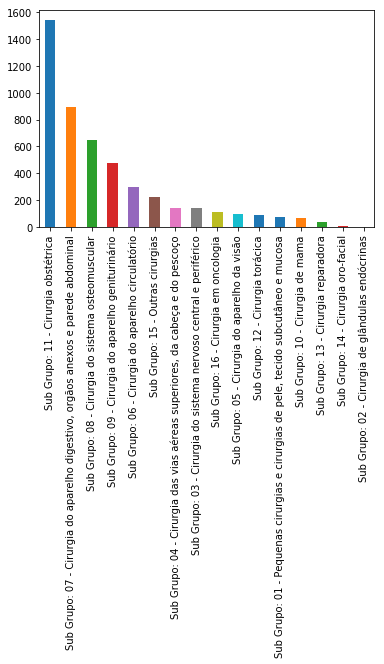

In [12]:
# plotando grafico de barras
df['Sub grupo procedimento'].value_counts().plot.bar()

In [13]:
# selecionar todos os dados apenas relacionados no HOSPITAL DE BASE DO DISTRITO FEDERAL e jogar no df_hospbase
df_hospbase = df[df['Hospital'] == '0010456 HBDF HOSPITAL DE BASE DO DISTRITO FEDERAL']
df_hospbase.head(5)

,Hospital,Municipio,complexidade,Carater_atendimento,Sub grupo procedimento,Procedimento
1,0010456 HBDF HOSPITAL DE BASE DO DISTRITO FEDERAL,"BRASILIA, DF, BR",Média complexidade,Urgência,Sub Grupo: 03 - Cirurgia do sistema nervoso ce...,DERIVACAO VENTRICULAR EXTERNAR-SUBGALEAL EXTERNA
2,0010456 HBDF HOSPITAL DE BASE DO DISTRITO FEDERAL,"BRASILIA, DF, BR",Média complexidade,Urgência,Sub Grupo: 15 - Outras cirurgias,TRATAMENTO C/ CIRURGIAS MULTIPLAS
4,0010456 HBDF HOSPITAL DE BASE DO DISTRITO FEDERAL,"BRASILIA, DF, BR",Alta complexidade,Eletivo,Sub Grupo: 16 - Cirurgia em oncologia,RESSECCAO DE TUMOR DE PARTES MOLES EM ONCOLOGIA
5,0010456 HBDF HOSPITAL DE BASE DO DISTRITO FEDERAL,"BRASILIA, DF, BR",Alta complexidade,Eletivo,Sub Grupo: 06 - Cirurgia do aparelho circulatório,IMPLANTAÇÃO DE CATETER DE LONGA PERMANÊNCIA SE...
6,0010456 HBDF HOSPITAL DE BASE DO DISTRITO FEDERAL,"BRASILIA, DF, BR",Média complexidade,Urgência,Sub Grupo: 06 - Cirurgia do aparelho circulatório,TRATAMENTO CIRURGICO DE LESOES VASCULARES TRAU...


In [14]:
# descrição do HOSPITAL DE BASE DO DISTRITO FEDERAL
df_hospbase.describe()

,Hospital,Municipio,complexidade,Carater_atendimento,Sub grupo procedimento,Procedimento
count,735,735,735,735,735,735
unique,1,1,2,4,15,242
top,0010456 HBDF HOSPITAL DE BASE DO DISTRITO FEDERAL,"BRASILIA, DF, BR",Média complexidade,Urgência,Sub Grupo: 08 - Cirurgia do sistema osteomuscular,TRATAMENTO C/ CIRURGIAS MULTIPLAS
freq,735,735,551,361,156,47


In [15]:
# ver as 4 ultimas linhas do dataframe HOSPITAL DE BASE DO DISTRITO FEDERAL
df_hospbase.tail(4)

,Hospital,Municipio,complexidade,Carater_atendimento,Sub grupo procedimento,Procedimento
2370,0010456 HBDF HOSPITAL DE BASE DO DISTRITO FEDERAL,"BRASILIA, DF, BR",Média complexidade,Eletivo,Sub Grupo: 03 - Cirurgia do sistema nervoso ce...,DERIVACAO VENTRICULAR PARA PERITONEO / ATRIO /...
2371,0010456 HBDF HOSPITAL DE BASE DO DISTRITO FEDERAL,"BRASILIA, DF, BR",Alta complexidade,Eletivo,Sub Grupo: 16 - Cirurgia em oncologia,MASTECTOMIA RADICAL C/ LINFADENECTOMIA AXILAR ...
2372,0010456 HBDF HOSPITAL DE BASE DO DISTRITO FEDERAL,"BRASILIA, DF, BR",Alta complexidade,Eletivo,Sub Grupo: 16 - Cirurgia em oncologia,SEGMENTECTOMIA/QUADRANTECTOMIA/SETORECTOMIA DE...
2373,0010456 HBDF HOSPITAL DE BASE DO DISTRITO FEDERAL,"BRASILIA, DF, BR",Alta complexidade,Eletivo,Sub Grupo: 06 - Cirurgia do aparelho circulatório,ESTUDO ELETROFISIOLOGICO TERAPEUTICO II (ABLAC...


In [16]:
# procedimentos mais realizados no HOSPITAL DE BASE DO DISTRITO FEDERAL
df_hospbase['Procedimento'].value_counts()

TRATAMENTO C/ CIRURGIAS MULTIPLAS                                                         47
TRAQUEOSTOMIA                                                                             28
DERIVACAO VENTRICULAR PARA PERITONEO / ATRIO / PLEURA / RAQUE                             26
TORACOSTOMIA COM DRENAGEM PLEURAL FECHADA                                                 23
IMPLANTE DE MARCAPASSO DE CAMARA DUPLA TRANSVENOSO                                        21
TRATAMENTO CIRURGICO DE HEMATOMA SUBDURAL CRONICO                                         18
AMPUTACAO / DESARTICULACAO DE MEMBROS INFERIORES                                          17
TROCA DE GERADOR DE MARCAPASSO DE CAMARA DUPLA                                            14
FACOEMULSIFICACAO C/ IMPLANTE DE LENTE INTRA-OCULAR DOBRAVEL                              12
ANGIOPLASTIA CORONARIANA C/ IMPLANTE DE DOIS STENTS                                       11
MASTECTOMIA RADICAL C/ LINFADENECTOMIA AXILAR EM ONCOLOGIA            

In [17]:
# extrair amostras aleatorias
# 20 amostras aleatorias do dataframe 
df.sample(20)

,Hospital,Municipio,complexidade,Carater_atendimento,Sub grupo procedimento,Procedimento
3849,3276678 INSTITUTO DE CARDIOLOGIA DO DISTRITO F...,"CRUZEIRO, DF, BR",Alta complexidade,Eletivo,Sub Grupo: 06 - Cirurgia do aparelho circulatório,ANGIOPLASTIA CORONARIANA C/ IMPLANTE DE DOIS S...
814,6876617 HOSPITAL DA CRIANCA DE BRASILIA JOSE A...,"BRASILIA, DF, BR",Média complexidade,Eletivo,Sub Grupo: 07 - Cirurgia do aparelho digestivo...,HERNIOPLASTIA INGUINAL / CRURAL (UNILATERAL)
1698,0010456 HBDF HOSPITAL DE BASE DO DISTRITO FEDERAL,"BRASILIA, DF, BR",Média complexidade,Urgência,Sub Grupo: 04 - Cirurgia das vias aéreas super...,CORREÇÃO CIRÚRGICA DE FÍSTULA SALIVAR COM RETALHO
3449,0010472 HRG,"GAMA, DF, BR",Média complexidade,Urgência,Sub Grupo: 07 - Cirurgia do aparelho digestivo...,LAPAROTOMIA EXPLORADORA
3337,0010472 HRG,"GAMA, DF, BR",Média complexidade,Urgência,Sub Grupo: 07 - Cirurgia do aparelho digestivo...,COLECTOMIA PARCIAL (HEMICOLECTOMIA)
4023,0010464 HRAN,"BRASILIA, DF, BR",Média complexidade,Urgência,Sub Grupo: 11 - Cirurgia obstétrica,PARTO CESARIANO
1255,0010480 HOSPITAL REGIONAL DE CEILANDIA,"CEILANDIA, DF, BR",Média complexidade,Urgência,Sub Grupo: 08 - Cirurgia do sistema osteomuscular,TRATAMENTO CIRÚRGICO DE FRATURA / LESÃO FISARI...
4304,0010480 HOSPITAL REGIONAL DE CEILANDIA,"CEILANDIA, DF, BR",Média complexidade,Eletivo,Sub Grupo: 11 - Cirurgia obstétrica,PARTO CESARIANO
1502,0010456 HBDF HOSPITAL DE BASE DO DISTRITO FEDERAL,"BRASILIA, DF, BR",Média complexidade,Urgência,Sub Grupo: 08 - Cirurgia do sistema osteomuscular,REDUÇÃO INCRUENTA DE FRATURA DOS METACARPIANOS
3888,0010464 HRAN,"BRASILIA, DF, BR",Média complexidade,Urgência,Sub Grupo: 11 - Cirurgia obstétrica,PARTO CESARIANO EM GESTACAO DE ALTO RISCO


In [18]:
df['Carater_atendimento'].value_counts()

Urgência                                                           3794
Eletivo                                                             977
Outros tipos lesões/envenenamentos por agentes químicos/físicos      60
Outros tipo de acidente de trânsito                                  31
Name: Carater_atendimento, dtype: int64

In [19]:
# extrair e analisar os 31 casos de cirurgia com acidente de transito
df_acid_car = df[df['Carater_atendimento'] == 'Outros tipo de acidente de trânsito']

In [20]:
df_acid_car

,Hospital,Municipio,complexidade,Carater_atendimento,Sub grupo procedimento,Procedimento
123,0010456 HBDF HOSPITAL DE BASE DO DISTRITO FEDERAL,"BRASILIA, DF, BR",Média complexidade,Outros tipo de acidente de trânsito,Sub Grupo: 08 - Cirurgia do sistema osteomuscular,TRATAMENTO CIRÚRGICO DE FRATURA / LESÃO FISARI...
206,0010456 HBDF HOSPITAL DE BASE DO DISTRITO FEDERAL,"BRASILIA, DF, BR",Média complexidade,Outros tipo de acidente de trânsito,Sub Grupo: 08 - Cirurgia do sistema osteomuscular,TRATAMENTO CIRÚRGICO DE FRATURA DA DIÁFISE DO ...
212,0010456 HBDF HOSPITAL DE BASE DO DISTRITO FEDERAL,"BRASILIA, DF, BR",Média complexidade,Outros tipo de acidente de trânsito,Sub Grupo: 12 - Cirurgia torácica,TORACOSTOMIA COM DRENAGEM PLEURAL FECHADA
826,0010456 HBDF HOSPITAL DE BASE DO DISTRITO FEDERAL,"BRASILIA, DF, BR",Média complexidade,Outros tipo de acidente de trânsito,Sub Grupo: 12 - Cirurgia torácica,TORACOSTOMIA COM DRENAGEM PLEURAL FECHADA
1229,0010456 HBDF HOSPITAL DE BASE DO DISTRITO FEDERAL,"BRASILIA, DF, BR",Média complexidade,Outros tipo de acidente de trânsito,Sub Grupo: 03 - Cirurgia do sistema nervoso ce...,TRATAMENTO CIRURGICO DE HEMATOMA SUBDURAL CRONICO
1307,0010456 HBDF HOSPITAL DE BASE DO DISTRITO FEDERAL,"BRASILIA, DF, BR",Média complexidade,Outros tipo de acidente de trânsito,Sub Grupo: 08 - Cirurgia do sistema osteomuscular,TRATAMENTO CIRÚRGICO DE FRATURA DA DIÁFISE DA ...
1534,0010456 HBDF HOSPITAL DE BASE DO DISTRITO FEDERAL,"BRASILIA, DF, BR",Média complexidade,Outros tipo de acidente de trânsito,Sub Grupo: 08 - Cirurgia do sistema osteomuscular,TRATAMENTO CIRÚRGICO DE FRATURA DO TORNOZELO U...
1568,0010456 HBDF HOSPITAL DE BASE DO DISTRITO FEDERAL,"BRASILIA, DF, BR",Média complexidade,Outros tipo de acidente de trânsito,Sub Grupo: 08 - Cirurgia do sistema osteomuscular,TRATAMENTO CIRÚRGICO DE FRATURA / LESÃO FISARI...
1571,0010456 HBDF HOSPITAL DE BASE DO DISTRITO FEDERAL,"BRASILIA, DF, BR",Média complexidade,Outros tipo de acidente de trânsito,Sub Grupo: 08 - Cirurgia do sistema osteomuscular,TRATAMENTO CIRÚRGICO DE FRATURA DA DIÁFISE DA ...
1606,0010456 HBDF HOSPITAL DE BASE DO DISTRITO FEDERAL,"BRASILIA, DF, BR",Média complexidade,Outros tipo de acidente de trânsito,Sub Grupo: 04 - Cirurgia das vias aéreas super...,OSTEOSSÍNTESE DE FRATURA COMPLEXA DA MAXILA


In [21]:
# analisando o tipo de procedimento realizado em caso de acidente de carros
df_acid_car['Procedimento'].value_counts()

TRATAMENTO C/ CIRURGIAS MULTIPLAS                                                                       4
TRATAMENTO CIRÚRGICO DE FRATURA DA DIÁFISE DO FÊMUR                                                     3
OSTEOSSÍNTESE DE FRATURA SIMPLES DE MANDÍBULA                                                           3
REDUCAO INCRUENTA DE FRATURA / LUXACAO / FRATURA-LUXACAO DO TORNOZELO                                   3
TORACOSTOMIA COM DRENAGEM PLEURAL FECHADA                                                               2
TRATAMENTO CIRÚRGICO DE FRATURA DA DIÁFISE DA TÍBIA                                                     2
LAPAROTOMIA EXPLORADORA                                                                                 1
TRATAMENTO CIRÚRGICO DE FRATURA TRANSTROCANTERIANA                                                      1
OSTEOSSÍNTESE DA FRATURA COMPLEXA DA MANDÍBULA                                                          1
TRATAMENTO CIRÚRGICO DE FRATURA DO TORNOZELO U

### Fato interessante analisado: todas as cirurgias envolvendo acidente de carros foram realizadas no hospital de base

In [22]:
df_hospbase['Procedimento'].value_counts()

TRATAMENTO C/ CIRURGIAS MULTIPLAS                                                         47
TRAQUEOSTOMIA                                                                             28
DERIVACAO VENTRICULAR PARA PERITONEO / ATRIO / PLEURA / RAQUE                             26
TORACOSTOMIA COM DRENAGEM PLEURAL FECHADA                                                 23
IMPLANTE DE MARCAPASSO DE CAMARA DUPLA TRANSVENOSO                                        21
TRATAMENTO CIRURGICO DE HEMATOMA SUBDURAL CRONICO                                         18
AMPUTACAO / DESARTICULACAO DE MEMBROS INFERIORES                                          17
TROCA DE GERADOR DE MARCAPASSO DE CAMARA DUPLA                                            14
FACOEMULSIFICACAO C/ IMPLANTE DE LENTE INTRA-OCULAR DOBRAVEL                              12
ANGIOPLASTIA CORONARIANA C/ IMPLANTE DE DOIS STENTS                                       11
MASTECTOMIA RADICAL C/ LINFADENECTOMIA AXILAR EM ONCOLOGIA            

In [24]:
df.sample(20) # amostras aleatorias

,Hospital,Municipio,complexidade,Carater_atendimento,Sub grupo procedimento,Procedimento
4195,0010529 HRPL,"PLANALTINA, DF, BR",Média complexidade,Urgência,Sub Grupo: 08 - Cirurgia do sistema osteomuscular,TRATAMENTO CIRÚRGICO DE FRATURA DO TORNOZELO U...
2887,5717515 HRSM,"SANTA MARIA, DF, BR",Média complexidade,Urgência,Sub Grupo: 11 - Cirurgia obstétrica,PARTO CESARIANO
693,3055450 CBV CENTRO BRASILEIRO DA VISAO,"BRASILIA, DF, BR",Alta complexidade,Eletivo,Sub Grupo: 05 - Cirurgia do aparelho da visão,VITRECTOMIA POSTERIOR COM INFUSÃO DE PERFLUOCA...
1302,2672197 HRSAM HOSPITAL REGIONAL DE SAMAMBAIA,"SAMAMBAIA, DF, BR",Média complexidade,Urgência,Sub Grupo: 11 - Cirurgia obstétrica,CURETAGEM POS-ABORTAMENTO / PUERPERAL
3682,0010472 HRG,"GAMA, DF, BR",Média complexidade,Urgência,Sub Grupo: 09 - Cirurgia do aparelho geniturin...,INSTALACAO ENDOSCOPICA DE CATETER DUPLO J
1278,2672197 HRSAM HOSPITAL REGIONAL DE SAMAMBAIA,"SAMAMBAIA, DF, BR",Média complexidade,Eletivo,Sub Grupo: 07 - Cirurgia do aparelho digestivo...,COLECISTECTOMIA
4160,0010464 HRAN,"BRASILIA, DF, BR",Média complexidade,Urgência,Sub Grupo: 07 - Cirurgia do aparelho digestivo...,ENTEROTOMIA E/OU ENTERORRAFIA C/ SUTURA / RESS...
625,0010545 HRBZ,"BRAZLANDIA, DF, BR",Média complexidade,Urgência,Sub Grupo: 11 - Cirurgia obstétrica,PARTO CESARIANO
4842,0010480 HOSPITAL REGIONAL DE CEILANDIA,"CEILANDIA, DF, BR",Média complexidade,Urgência,Sub Grupo: 11 - Cirurgia obstétrica,PARTO CESARIANO
2363,0010456 HBDF HOSPITAL DE BASE DO DISTRITO FEDERAL,"BRASILIA, DF, BR",Alta complexidade,Eletivo,Sub Grupo: 06 - Cirurgia do aparelho circulatório,REVASCULARIZACAO POR PONTE / TROMBOENDARTERECT...


In [25]:
df.tail(5) # mostra os conco ultimos elementos do dataframe

,Hospital,Municipio,complexidade,Carater_atendimento,Sub grupo procedimento,Procedimento
4857,0010480 HOSPITAL REGIONAL DE CEILANDIA,"CEILANDIA, DF, BR",Média complexidade,Eletivo,Sub Grupo: 09 - Cirurgia do aparelho geniturin...,VASECTOMIA
4858,0010480 HOSPITAL REGIONAL DE CEILANDIA,"CEILANDIA, DF, BR",Média complexidade,Eletivo,Sub Grupo: 09 - Cirurgia do aparelho geniturin...,VASECTOMIA
4859,0010480 HOSPITAL REGIONAL DE CEILANDIA,"CEILANDIA, DF, BR",Média complexidade,Urgência,Sub Grupo: 08 - Cirurgia do sistema osteomuscular,ARTROPLASTIA TOTAL PRIMÁRIA DO QUADRIL CIMENTADA
4860,0010472 HRG,"GAMA, DF, BR",Alta complexidade,Urgência,Sub Grupo: 16 - Cirurgia em oncologia,AMPUTACAO ABDOMINO-PERINEAL DE RETO EM ONCOLOGIA
4861,0010480 HOSPITAL REGIONAL DE CEILANDIA,"CEILANDIA, DF, BR",Média complexidade,Urgência,Sub Grupo: 07 - Cirurgia do aparelho digestivo...,LAPAROTOMIA EXPLORADORA


In [26]:
df.head(5) # mostra os primeiros elementos do dataframe

,Hospital,Municipio,complexidade,Carater_atendimento,Sub grupo procedimento,Procedimento
0,6876617 HOSPITAL DA CRIANCA DE BRASILIA JOSE A...,"BRASILIA, DF, BR",Média complexidade,Eletivo,Sub Grupo: 15 - Outras cirurgias,TRATAMENTO C/ CIRURGIAS MULTIPLAS
1,0010456 HBDF HOSPITAL DE BASE DO DISTRITO FEDERAL,"BRASILIA, DF, BR",Média complexidade,Urgência,Sub Grupo: 03 - Cirurgia do sistema nervoso ce...,DERIVACAO VENTRICULAR EXTERNAR-SUBGALEAL EXTERNA
2,0010456 HBDF HOSPITAL DE BASE DO DISTRITO FEDERAL,"BRASILIA, DF, BR",Média complexidade,Urgência,Sub Grupo: 15 - Outras cirurgias,TRATAMENTO C/ CIRURGIAS MULTIPLAS
3,6876617 HOSPITAL DA CRIANCA DE BRASILIA JOSE A...,"BRASILIA, DF, BR",Média complexidade,Eletivo,Sub Grupo: 07 - Cirurgia do aparelho digestivo...,HERNIOPLASTIA UMBILICAL
4,0010456 HBDF HOSPITAL DE BASE DO DISTRITO FEDERAL,"BRASILIA, DF, BR",Alta complexidade,Eletivo,Sub Grupo: 16 - Cirurgia em oncologia,RESSECCAO DE TUMOR DE PARTES MOLES EM ONCOLOGIA


In [30]:
# procurar dentro do dataframe do hospital de base, todos os procedimentos relacionados a amputação
# total de amputações : 33
df_hospbase[df_hospbase['Procedimento'].str.contains('AMPUTA')].count()

Hospital                  33
Municipio                 33
complexidade              33
Carater_atendimento       33
Sub grupo procedimento    33
Procedimento              33
dtype: int64

In [36]:
df_hospbase_ampt = df_hospbase[df_hospbase['Procedimento'].str.contains('AMPUTA')]

In [37]:
df_hospbase_ampt

,Hospital,Municipio,complexidade,Carater_atendimento,Sub grupo procedimento,Procedimento
10,0010456 HBDF HOSPITAL DE BASE DO DISTRITO FEDERAL,"BRASILIA, DF, BR",Média complexidade,Urgência,Sub Grupo: 08 - Cirurgia do sistema osteomuscular,AMPUTACAO / DESARTICULACAO DE MEMBROS INFERIORES
62,0010456 HBDF HOSPITAL DE BASE DO DISTRITO FEDERAL,"BRASILIA, DF, BR",Média complexidade,Urgência,Sub Grupo: 08 - Cirurgia do sistema osteomuscular,AMPUTAÇÃO / DESARTICULAÇÃO DE DEDO
63,0010456 HBDF HOSPITAL DE BASE DO DISTRITO FEDERAL,"BRASILIA, DF, BR",Média complexidade,Urgência,Sub Grupo: 08 - Cirurgia do sistema osteomuscular,AMPUTACAO / DESARTICULACAO DE PE E TARSO
98,0010456 HBDF HOSPITAL DE BASE DO DISTRITO FEDERAL,"BRASILIA, DF, BR",Média complexidade,Urgência,Sub Grupo: 08 - Cirurgia do sistema osteomuscular,AMPUTAÇÃO / DESARTICULAÇÃO DE DEDO
125,0010456 HBDF HOSPITAL DE BASE DO DISTRITO FEDERAL,"BRASILIA, DF, BR",Média complexidade,Urgência,Sub Grupo: 08 - Cirurgia do sistema osteomuscular,AMPUTACAO / DESARTICULACAO DE PE E TARSO
185,0010456 HBDF HOSPITAL DE BASE DO DISTRITO FEDERAL,"BRASILIA, DF, BR",Média complexidade,Urgência,Sub Grupo: 08 - Cirurgia do sistema osteomuscular,AMPUTACAO / DESARTICULACAO DE MEMBROS INFERIORES
186,0010456 HBDF HOSPITAL DE BASE DO DISTRITO FEDERAL,"BRASILIA, DF, BR",Média complexidade,Eletivo,Sub Grupo: 08 - Cirurgia do sistema osteomuscular,AMPUTACAO / DESARTICULACAO DE MEMBROS INFERIORES
187,0010456 HBDF HOSPITAL DE BASE DO DISTRITO FEDERAL,"BRASILIA, DF, BR",Média complexidade,Urgência,Sub Grupo: 08 - Cirurgia do sistema osteomuscular,AMPUTACAO / DESARTICULACAO DE PE E TARSO
188,0010456 HBDF HOSPITAL DE BASE DO DISTRITO FEDERAL,"BRASILIA, DF, BR",Média complexidade,Urgência,Sub Grupo: 08 - Cirurgia do sistema osteomuscular,AMPUTACAO / DESARTICULACAO DE MEMBROS INFERIORES
195,0010456 HBDF HOSPITAL DE BASE DO DISTRITO FEDERAL,"BRASILIA, DF, BR",Média complexidade,Urgência,Sub Grupo: 08 - Cirurgia do sistema osteomuscular,AMPUTAÇÃO / DESARTICULAÇÃO DE MEMBROS SUPERIORES


In [41]:
df_hospbase[df_hospbase['Procedimento'].str.contains('AMPUTA')].describe()

,Hospital,Municipio,complexidade,Carater_atendimento,Sub grupo procedimento,Procedimento
count,33,33,33,33,33,33
unique,1,1,1,2,1,5
top,0010456 HBDF HOSPITAL DE BASE DO DISTRITO FEDERAL,"BRASILIA, DF, BR",Média complexidade,Urgência,Sub Grupo: 08 - Cirurgia do sistema osteomuscular,AMPUTACAO / DESARTICULACAO DE MEMBROS INFERIORES
freq,33,33,33,25,33,17


In [42]:
# pesquisando pelos procedimentos de parto cesariano
df_parto_cesariano = df[df['Procedimento'] == 'PARTO CESARIANO']

In [44]:
df_parto_cesariano.describe()

,Hospital,Municipio,complexidade,Carater_atendimento,Sub grupo procedimento,Procedimento
count,1060,1060,1060,1060,1060,1060
unique,12,10,1,2,1,1
top,0010480 HOSPITAL REGIONAL DE CEILANDIA,"BRASILIA, DF, BR",Média complexidade,Urgência,Sub Grupo: 11 - Cirurgia obstétrica,PARTO CESARIANO
freq,165,244,1060,1041,1060,1060


In [48]:
df_parto_cesariano.count()

Hospital                  1060
Municipio                 1060
complexidade              1060
Carater_atendimento       1060
Sub grupo procedimento    1060
Procedimento              1060
dtype: int64

In [49]:
df_parto_cesariano.head()

,Hospital,Municipio,complexidade,Carater_atendimento,Sub grupo procedimento,Procedimento
130,0010545 HRBZ,"BRAZLANDIA, DF, BR",Média complexidade,Urgência,Sub Grupo: 11 - Cirurgia obstétrica,PARTO CESARIANO
131,0010545 HRBZ,"BRAZLANDIA, DF, BR",Média complexidade,Urgência,Sub Grupo: 11 - Cirurgia obstétrica,PARTO CESARIANO
132,0010545 HRBZ,"BRAZLANDIA, DF, BR",Média complexidade,Urgência,Sub Grupo: 11 - Cirurgia obstétrica,PARTO CESARIANO
133,0010545 HRBZ,"BRAZLANDIA, DF, BR",Média complexidade,Urgência,Sub Grupo: 11 - Cirurgia obstétrica,PARTO CESARIANO
141,0010545 HRBZ,"BRAZLANDIA, DF, BR",Média complexidade,Urgência,Sub Grupo: 11 - Cirurgia obstétrica,PARTO CESARIANO


In [51]:
# verificando a quantidde de partos cesarianos por hospital
df_parto_cesariano['Hospital'].value_counts()

0010480 HOSPITAL REGIONAL DE CEILANDIA                165
2645157 HRPA                                          123
5717515 HRSM                                          110
0010537 HOSPITAL MATERNO INFANTIL DE BRASILIA HMIB     93
2672197 HRSAM HOSPITAL REGIONAL DE SAMAMBAIA           92
0010502 HRS                                            92
0010464 HRAN                                           88
0010529 HRPL                                           79
0010499 HRT HOSPITAL REGIONAL DE TAGUATINGA            74
0010510 HOSPITAL UNIVERSITARIO DE BRASILIA             63
0010472 HRG                                            47
0010545 HRBZ                                           34
Name: Hospital, dtype: int64

In [52]:
# verificar os partos por carater de atendimento
df_parto_cesariano['Carater_atendimento'].value_counts()

Urgência    1041
Eletivo       19
Name: Carater_atendimento, dtype: int64

### dos 1060 atendimentos de parto cesariano, 1041 eram de urgência

In [59]:
# verificando por outros tipos de parto
df_partos = df[df['Procedimento'].str.contains('PARTO')]
df_partos.describe()

,Hospital,Municipio,complexidade,Carater_atendimento,Sub grupo procedimento,Procedimento
count,1316,1316,1316,1316,1316,1316
unique,12,10,1,2,1,4
top,0010472 HRG,"BRASILIA, DF, BR",Média complexidade,Urgência,Sub Grupo: 11 - Cirurgia obstétrica,PARTO CESARIANO
freq,184,338,1316,1293,1316,1060


#### Fora identificados quatro tipos de parto, estamos tentando localizar os partos normais

In [60]:
# listando os 4 tipos de parto
df_partos['Procedimento'].value_counts()

PARTO CESARIANO                                                         1060
PARTO CESARIANO EM GESTACAO DE ALTO RISCO                                166
SUTURA DE LACERACOES DE TRAJETO PELVICO (NO PARTO ANTES DA ADMISSAO)      56
PARTO CESARIANO C/ LAQUEADURA TUBARIA                                     34
Name: Procedimento, dtype: int64

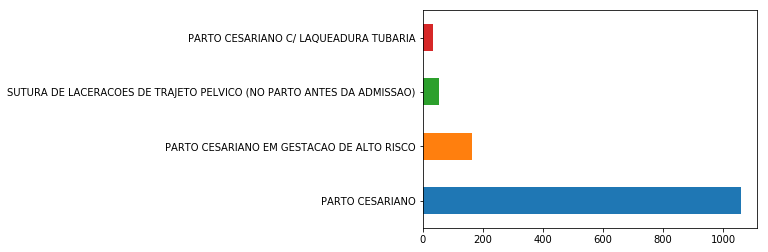

In [61]:
df_partos['Procedimento'].value_counts().plot.barh()

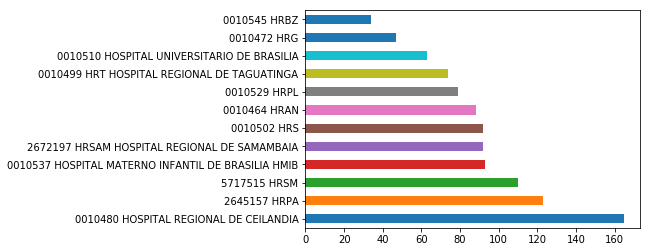

In [62]:
# grafico quantidade de partos por hospital 
df_parto_cesariano['Hospital'].value_counts().plot.barh()

In [63]:
df_parto_cesariano['Hospital'].value_counts()

0010480 HOSPITAL REGIONAL DE CEILANDIA                165
2645157 HRPA                                          123
5717515 HRSM                                          110
0010537 HOSPITAL MATERNO INFANTIL DE BRASILIA HMIB     93
2672197 HRSAM HOSPITAL REGIONAL DE SAMAMBAIA           92
0010502 HRS                                            92
0010464 HRAN                                           88
0010529 HRPL                                           79
0010499 HRT HOSPITAL REGIONAL DE TAGUATINGA            74
0010510 HOSPITAL UNIVERSITARIO DE BRASILIA             63
0010472 HRG                                            47
0010545 HRBZ                                           34
Name: Hospital, dtype: int64

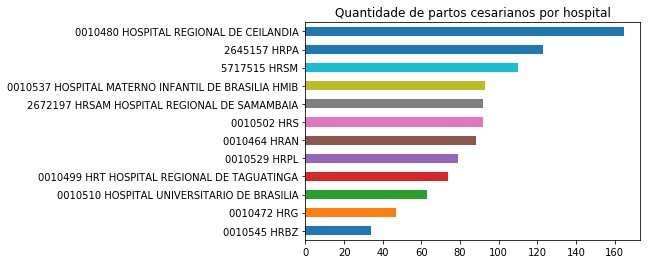

In [66]:
# ordenar o grafico e colocar um titulo
df_parto_cesariano['Hospital'].value_counts(ascending=True).plot.barh(
title='Quantidade de partos cesarianos por hospital')